<h2 id="exercises">Exercises</h2>
<p>Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:</p>
<ol>
<li>
<p>What is your baseline prediction? What is your baseline accuracy? <em>remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.</em></p>
</li>

In [1]:
from acquire import get_titanic_data
from prepare import clean_titanic
import warnings
warnings.filterwarnings('ignore')

In [2]:
# grab and clean our data:
train, validate, test = clean_titanic(
    get_titanic_data()
)

In [3]:
train.shape, validate.shape, test.shape

((498, 12), (214, 12), (179, 12))

In [4]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
474,0,3,female,22.00000,0,0,9.8375,Southampton,1,0,0,1
370,1,1,male,25.00000,1,0,55.4417,Cherbourg,0,1,0,0
573,1,3,female,30.53944,0,0,7.7500,Queenstown,1,0,1,0
110,0,1,male,47.00000,0,0,52.0000,Southampton,1,1,0,1
167,0,3,female,45.00000,1,4,27.9000,Southampton,0,0,0,1


In [6]:
# whats the target?
# y is our survival for titanic
# i.e. we want to predict if someone survives or not
# train.survive == target
# to get the baseline,
# we want the majority class
train.survived.mode()

0    0
dtype: int64

In [7]:
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [8]:
# baseline prediction: its death! death for everyone

In [10]:
(train.survived == 0).mean()

0.6164658634538153

In [11]:
train['baseline_pred'] = 0
baseline = 0
baseline_accuracy = (train.survived == 0).mean()

In [14]:
baseline_array = train['baseline_pred'].values

In [13]:
train['baseline_pred'].value_counts()

0    498
Name: baseline_pred, dtype: int64

In [15]:
baseline_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
train = train.drop(columns='baseline_pred')

In [17]:
X_cols = train.columns.to_list()
y_col = 'survived'

In [27]:
# remove the target from our X
# remove sex and embark town,
# since we have the encoded versions
# so itll play nice with any algorithm

In [23]:
X_cols.remove('survived')

In [24]:
X_cols.remove('sex')
X_cols.remove('embark_town')

In [25]:
train[X_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 474 to 94
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pclass                   498 non-null    int64  
 1   age                      498 non-null    float64
 2   sibsp                    498 non-null    int64  
 3   parch                    498 non-null    int64  
 4   fare                     498 non-null    float64
 5   alone                    498 non-null    int64  
 6   sex_male                 498 non-null    uint8  
 7   embark_town_Queenstown   498 non-null    uint8  
 8   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 28.7 KB


In [26]:
# assign X_train to the portion of train that meets my
# standards for independent variables
# assign y_train to just my target
X_train = train[X_cols]
y_train = train[y_col]

<li>
<p>Fit the decision tree classifier to your training sample and transform (i.e.  make predictions on the training sample)</p>
</li>

In [28]:
from sklearn.tree import DecisionTreeClassifier,\
export_text,\
plot_tree
from sklearn.metrics import accuracy_score, \
confusion_matrix,\
classification_report

In [29]:
# make the thing
dt = DecisionTreeClassifier()
# fit the thing
dt.fit(X_train, y_train)
# use the thing
preds = dt.predict(X_train)

<li>
<p>Evaluate your in-sample results using the model score, confusion matrix, and classification report.</p>
</li>

In [30]:
# model score: same as accuracy!
accuracy_score(train.survived, preds)

0.9839357429718876

In [31]:
# same thing with score
# predict based on my x train, compare to y_train
dt.score(X_train, y_train)

0.9839357429718876

In [35]:
(preds == y_train).mean()

0.9839357429718876

In [33]:
# classification report:
print(classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       307
           1       0.99      0.96      0.98       191

    accuracy                           0.98       498
   macro avg       0.99      0.98      0.98       498
weighted avg       0.98      0.98      0.98       498



In [36]:
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [37]:
confusion_matrix(y_train, preds)

array([[306,   1],
       [  7, 184]])

In [39]:
import pandas as pd
import numpy as np

In [40]:
rubric = pd.DataFrame(
    {'pred_0': ['True Negative', 'False Negative'],
     'pred_1': ['False Positive', 'True Positive']
    }, index=['actual_0','actual_1']
)

In [45]:
conf = confusion_matrix(y_train, preds, labels=[0,1])

In [46]:
conf

array([[306,   1],
       [  7, 184]])

In [44]:
rubric + ': ' + conf.astype(str)

,pred_0,pred_1
actual_0,True Negative: 306,False Positive: 1
actual_1,False Negative: 7,True Positive: 184


<li>
<p>Compute:  Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.</p>
</li>

In [48]:
conf.ravel()
TN, FP, FN, TP = conf.ravel()

In [49]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)
TNR = TN / (FP + TN)
FNR = FN / (FN + TP)
precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))
support_0 = train[train.survived == 0].shape[0]
support_1 = train[train.survived == 1].shape[0]

In [51]:
accuracy, TPR, FPR, TNR, FNR, precision, recall, f1, support_0, support_1

(0.9839357429718876,
 0.9633507853403142,
 0.003257328990228013,
 0.996742671009772,
 0.03664921465968586,
 0.9945945945945946,
 0.9633507853403142,
 0.9787234042553191,
 307,
 191)

accuracy: everything right / everything ==> TP + TN / (TP + TN + FP + FN)
TPR: TP / (TP + FN)
FPR: FP / (FP + TN)
TNR: TN / (FP + TN)
FNR: FN / (FN + TP)
Precision: TP / (TP + FP)
Recall: TP / (TP + FN)
F1: 2 * (Precision * Recall) / ( Precision + Recall)
Support: sum of true positives, sum of true negatives

<li>
<p>Run through steps 2-4 using a different <code>max_depth</code> value.</p>
</li>

In [52]:
X_val = validate[X_cols]
y_val = validate[y_col]

In [57]:
model_dict = {}
for i in range(2,15):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train, y_train)
    model_dict[f'dt_depth_{i}'] =  {}
    model_dict[f'dt_depth_{i}']['model'] = clf
    model_dict[f'dt_depth_{i}']['train_score'] = \
    clf.score(X_train, y_train)
    model_dict[f'dt_depth_{i}']['val_score'] = \
    clf.score(X_val, y_val)
    model_dict[f'dt_depth_{i}']['val_diff'] = \
    clf.score(X_train, y_train) - clf.score(X_val, y_val)

In [58]:
model_dict.keys()

dict_keys(['dt_depth_2', 'dt_depth_3', 'dt_depth_4', 'dt_depth_5', 'dt_depth_6', 'dt_depth_7', 'dt_depth_8', 'dt_depth_9', 'dt_depth_10', 'dt_depth_11', 'dt_depth_12', 'dt_depth_13', 'dt_depth_14'])

In [61]:
model_dict['dt_depth_2']

{'model': DecisionTreeClassifier(max_depth=2),
 'train_score': 0.8012048192771084,
 'val_score': 0.7616822429906542,
 'val_diff': 0.03952257628645417}

<li>
<p>Which model performs better on your in-sample data?</p>
</li>

In [64]:
for model in model_dict:
    print(model)
    print(model_dict[model]['train_score'])

dt_depth_2
0.8012048192771084
dt_depth_3
0.8333333333333334
dt_depth_4
0.8433734939759037
dt_depth_5
0.8614457831325302
dt_depth_6
0.8795180722891566
dt_depth_7
0.8895582329317269
dt_depth_8
0.8995983935742972
dt_depth_9
0.9196787148594378
dt_depth_10
0.9437751004016064
dt_depth_11
0.9578313253012049
dt_depth_12
0.9718875502008032
dt_depth_13
0.9759036144578314
dt_depth_14
0.9799196787148594


<li>
<p>Which model performs best on your out-of-sample data, the <code>validate</code> set?</p>
</li>

In [66]:
for model in model_dict:
    print(model)
    print(model_dict[model]['val_score'])

dt_depth_2
0.7616822429906542
dt_depth_3
0.7757009345794392
dt_depth_4
0.7757009345794392
dt_depth_5
0.7850467289719626
dt_depth_6
0.7850467289719626
dt_depth_7
0.7616822429906542
dt_depth_8
0.7289719626168224
dt_depth_9
0.7383177570093458
dt_depth_10
0.7383177570093458
dt_depth_11
0.7242990654205608
dt_depth_12
0.7242990654205608
dt_depth_13
0.719626168224299
dt_depth_14
0.705607476635514


In [67]:
# 5 and six appear to be the best!

work with titanic data to do the following: </p>

<ol>
<li>
<p>Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.</p>
</li>

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
# make the thing
rf = RandomForestClassifier(min_samples_leaf=1,
                            max_depth=10,
                            random_state=1349)
# fit the thing
# remember only ever call fit on train data!!
# !!
rf.fit(X_train, y_train)
# use the thing!
rf_0_preds = rf.predict(X_train)
rf.score(X_train, y_train)

0.9598393574297188

In [70]:
rf.score(X_val, y_val)

0.7850467289719626

<li>
<p>Evaluate your results using the model score, confusion matrix, and classification report.</p>
</li>

In [71]:
conf_rf = confusion_matrix(y_train, rf_0_preds)

In [72]:
rubric + ': ' + conf_rf.astype(str)

,pred_0,pred_1
actual_0,True Negative: 304,False Positive: 3
actual_1,False Negative: 17,True Positive: 174


In [74]:
pd.DataFrame(
    classification_report(
        y_train,
        rf_0_preds,
        output_dict=True)
)

,0,1,accuracy,macro avg,weighted avg
precision,0.947040,0.983051,0.959839,0.965046,0.960852
recall,0.990228,0.910995,0.959839,0.950611,0.959839
f1-score,0.968153,0.945652,0.959839,0.956903,0.959523
support,307.000000,191.000000,0.959839,498.000000,498.000000


<li>
<p>Print and clearly label the following:  Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.</p>
</li>

In [78]:
conf_rf.ravel()
TN, FP, FN, TP = conf_rf.ravel()

In [79]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)
TNR = TN / (FP + TN)
FNR = FN / (FN + TP)
precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))
support_0 = train[train.survived == 0].shape[0]
support_1 = train[train.survived == 1].shape[0]

In [80]:
accuracy, TPR, FPR, TNR, FNR, precision, recall, f1, support_0, support_1

(0.9598393574297188,
 0.9109947643979057,
 0.009771986970684038,
 0.990228013029316,
 0.08900523560209424,
 0.9830508474576272,
 0.9109947643979057,
 0.9456521739130435,
 307,
 191)

<li>
<p>Run through steps increasing your min_samples_leaf and decreasing your max_depth. </p>
</li>

In [87]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [89]:
list(range(10,1, -1))

[10, 9, 8, 7, 6, 5, 4, 3, 2]

In [91]:
[pair for pair in zip(range(1,10), range(10,1,-1))]

[(1, 10), (2, 9), (3, 8), (4, 7), (5, 6), (6, 5), (7, 4), (8, 3), (9, 2)]

In [ ]:
min_leaf = range(1,10)
max_depth = 

In [93]:
# I perhaps would do the same thing I did before with a loop!
rf_model_dict = {}
for i in [pair for pair in zip(range(1,10), 
                                range(10,1,-1))]:
    clf = RandomForestClassifier(min_samples_leaf=i[0],
                                 max_depth=i[1])
    clf.fit(X_train, y_train)
    # make a dictionary inside of my model_dictionary
    rf_model_dict[f'rf_{i[0]}'] =  {}
    # in the sub-dictionary:
    # assign the model object
    rf_model_dict[f'rf_{i[0]}']['model'] = clf
    #assign the train score
    rf_model_dict[f'rf_{i[0]}']['train_score'] = \
    clf.score(X_train, y_train)
    # assign the validate score
    rf_model_dict[f'rf_{i[0]}']['val_score'] = \
    clf.score(X_val, y_val)
    # assign the validation dropoff
    rf_model_dict[f'rf_{i[0]}']['val_diff'] = \
    clf.score(X_train, y_train) - clf.score(X_val, y_val)

In [116]:
rf_model_dict

{'rf_1': {'model': RandomForestClassifier(max_depth=10),
  'train_score': 0.9598393574297188,
  'val_score': 0.780373831775701,
  'val_diff': 0.17946552565401785},
 'rf_2': {'model': RandomForestClassifier(max_depth=9, min_samples_leaf=2),
  'train_score': 0.9116465863453815,
  'val_score': 0.8084112149532711,
  'val_diff': 0.10323537139211048},
 'rf_3': {'model': RandomForestClassifier(max_depth=8, min_samples_leaf=3),
  'train_score': 0.8875502008032129,
  'val_score': 0.794392523364486,
  'val_diff': 0.09315767743872694},
 'rf_4': {'model': RandomForestClassifier(max_depth=7, min_samples_leaf=4),
  'train_score': 0.8775100401606426,
  'val_score': 0.794392523364486,
  'val_diff': 0.08311751679615664},
 'rf_5': {'model': RandomForestClassifier(max_depth=6, min_samples_leaf=5),
  'train_score': 0.8694779116465864,
  'val_score': 0.780373831775701,
  'val_diff': 0.08910407987088542},
 'rf_6': {'model': RandomForestClassifier(max_depth=5, min_samples_leaf=6),
  'train_score': 0.85943775

In [97]:
max_score = 0
for model in rf_model_dict:
    if rf_model_dict[model]['val_score'] > max_score:
        max_score = rf_model_dict[model]['val_score']
        model_name = model

In [98]:
max_score

0.8084112149532711

In [99]:
model

'rf_9'

In [101]:
rf_model_dict['rf_9']['model']

RandomForestClassifier(max_depth=2, min_samples_leaf=9)

In [103]:
len([0 for i in range(0, validate.shape[0])])

214

In [106]:
# Prediction DataFrame!
pred_df = pd.DataFrame(
    {
        'baseline': [0 for i in range(
        0, validate.shape[0])],
        'y_true': y_val.values
    }
)

In [108]:
for model in rf_model_dict:
    model_preds = rf_model_dict[model]['model'].predict(X_val)
    pred_df[model] = model_preds

In [109]:
pred_df

,baseline,y_true,rf_1,rf_2,rf_3,rf_4,rf_5,rf_6,rf_7,rf_8,rf_9
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,1,1,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
209,0,0,0,0,0,0,0,0,0,0,0
210,0,1,1,1,1,1,1,1,1,1,1
211,0,1,1,1,1,1,1,1,1,1,1
212,0,0,0,0,0,0,0,0,0,0,0


In [110]:
rf_model_dict.keys()

dict_keys(['rf_1', 'rf_2', 'rf_3', 'rf_4', 'rf_5', 'rf_6', 'rf_7', 'rf_8', 'rf_9'])

In [111]:
rf_model_dict['rf_1'].keys()

dict_keys(['model', 'train_score', 'val_score', 'val_diff'])

In [112]:
[rf_model_dict[model]['train_score'] 
 for model in rf_model_dict]

[0.9598393574297188,
 0.9116465863453815,
 0.8875502008032129,
 0.8775100401606426,
 0.8694779116465864,
 0.8594377510040161,
 0.857429718875502,
 0.8453815261044176,
 0.8072289156626506]

In [ ]:
for model in rf_model_dict:
    rf_model_dict[model]['train_accuracy']

In [113]:
accuracy_df = pd.DataFrame(
 {
     'model':[model for model in rf_model_dict],
     'train_accuracy':[rf_model_dict[model]['train_score'] for model in rf_model_dict],
     'val_accuracy': [rf_model_dict[model]['val_score'] for model in rf_model_dict],
     'diff': [rf_model_dict[model]['val_diff'] for model in rf_model_dict]
 }
)

In [114]:
accuracy_df

,model,train_accuracy,val_accuracy,diff
0,rf_1,0.959839,0.780374,0.179466
1,rf_2,0.911647,0.808411,0.103235
2,rf_3,0.887550,0.794393,0.093158
3,rf_4,0.877510,0.794393,0.083118
4,rf_5,0.869478,0.780374,0.089104
5,rf_6,0.859438,0.780374,0.079064
6,rf_7,0.857430,0.775701,0.081729
7,rf_8,0.845382,0.780374,0.065008
8,rf_9,0.807229,0.757009,0.050220


<AxesSubplot:title={'center':'performance over depth of RF'}>

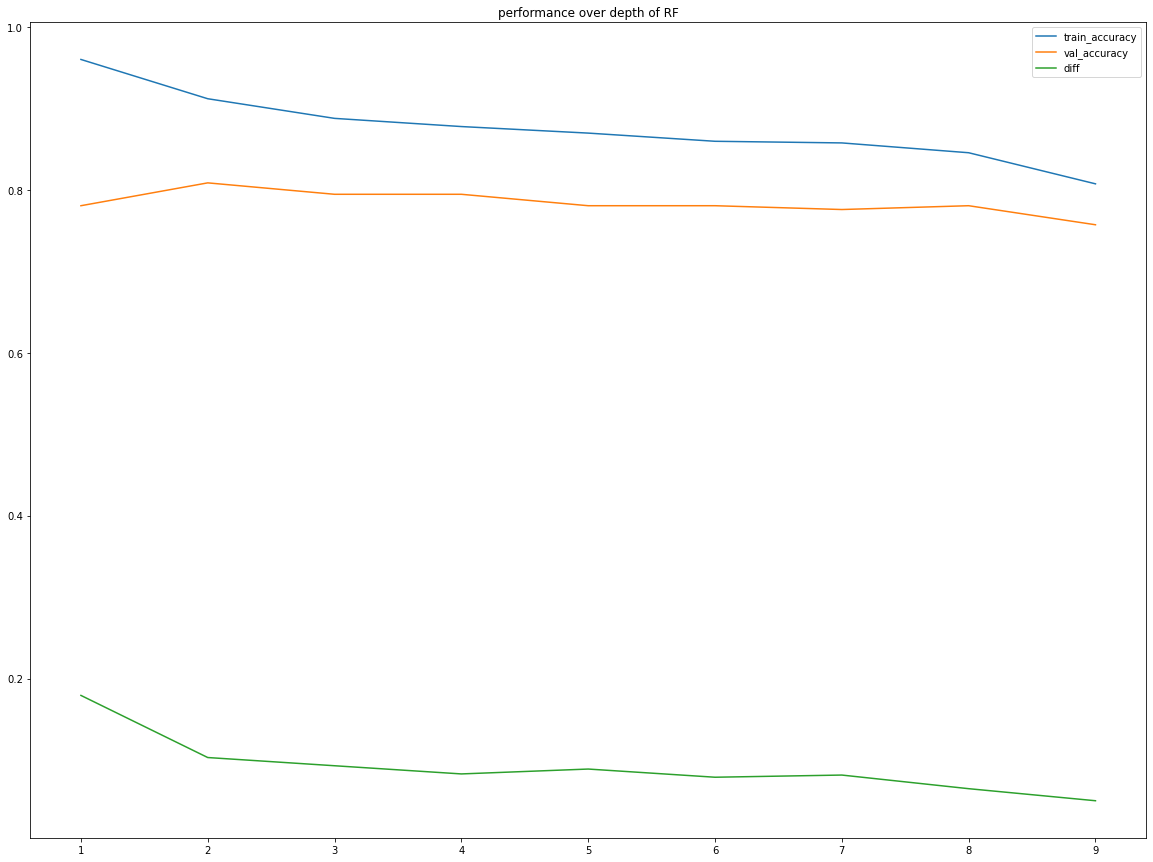

In [115]:
accuracy_df.set_index(accuracy_df.index + 1).plot(title='performance over depth of RF', figsize=(20,15))

<li>
<p>What are the differences in the evaluation metrics?  Which performs better on your in-sample data?  Why?</p>
</li>

</ol>
<p>After making a few models, which one has the best performance (or closest metrics) on both train and validate?</p>

In [117]:
model_name

'rf_2'

In [118]:
rf_model_dict['rf_2']

{'model': RandomForestClassifier(max_depth=9, min_samples_leaf=2),
 'train_score': 0.9116465863453815,
 'val_score': 0.8084112149532711,
 'val_diff': 0.10323537139211048}

In [119]:
# Let's presume this is indeed our best model, since
# it tends to perform the best on validate set


In [121]:
test_preds = rf_model_dict['rf_2']['model'].predict(
    test[X_cols])
test_score = rf_model_dict['rf_2']['model'].score(
    test[X_cols],test[y_col])

In [122]:
test_score

0.8212290502793296